# Sample Code for Visualizing Our Datasets

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from skimage.io import imread
import pprint
import json
import cv2

# helper function for drawing bouding box
def draw_bounding_box(img,x,y,width,height,color):
    if color == 'red':
        color = [255,0,0]
    elif color == 'green':
        color = [0,255,0]
    else:
        raise ValueError("unknown color")
    line_width = 3
    cv2.line(img, (x, y), (x + width, y), color, line_width)
    cv2.line(img, (x + width, y), (x + width, y+height), color, line_width)
    cv2.line(img, (x, y+height), (x + width, y+height), color, line_width)
    cv2.line(img, (x, y), (x, y+height), color, line_width)

## 1. GTACrash

### Sample accident scene image
003201.jpg is a sample accident scene image in our GTACrash dataset.

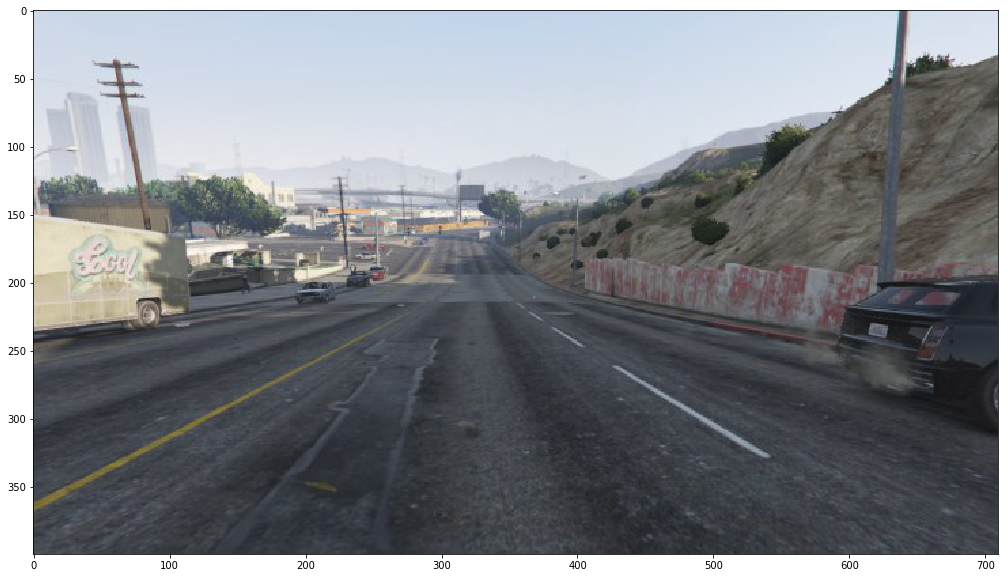

In [3]:
fileno = "003201"
sample_accident_img = imread("./GTACrash_accident_train/{}.jpg".format(fileno))
plt.figure(figsize=(20,10))
plt.imshow(sample_accident_img)
plt.show()

### Sample accident scene label
There are total 8 cars on this image, but only 6 of them which are close to ego vehicle are labeled.

In [4]:
with open('./GTACrash_accident_train/{}.json'.format(fileno)) as data_file:
    sample_accident_label = json.load(data_file)
pprint.pprint(sample_accident_label)

{'acceleration': 0.0,
 'angularVelocity': [0.002575254, -0.00719871, -0.00870621],
 'forwardV': [-0.3219495, 0.9305841, -0.1742444],
 'objectSize': [1.830663, 4.458614, 1.562617],
 'position': [1289.406, -1522.851, 43.63991],
 'speed': 6.84158373,
 'vehicleCount': 6,
 'vehicleInfo': [{'acceleration': 0.0,
                  'adaptedLabel': -1,
                  'angularVelocity': [0.0, 0.0, 0.0],
                  'driverAlive': 'false',
                  'driverExist': 'true',
                  'forwardV': [0.9951121, 0.07658419, 0.06234417],
                  'hashcode': 682519,
                  'height': 148,
                  'objectSize': [2.000296, 4.716197, 1.666888],
                  'position': [1294.398, -1515.804, 42.49871],
                  'speed': 0.0,
                  'syntheticLabel': 'false',
                  'width': 134,
                  'x': 576,
                  'y': 184},
                 {'acceleration': 0.0,
                  'adaptedLabel': -1,
          

### Visualization of a sample accident scene with bounding boxes (Before label adaptation)
- Green bounding boxes: Safe vehicles
- Red bounding boxes: Dangerous vehicles

Before applying the label adaptation using CTRA, we can see that the car which will collide with the ego vehicle is labeled dangerous even though it does not seem risky at all.

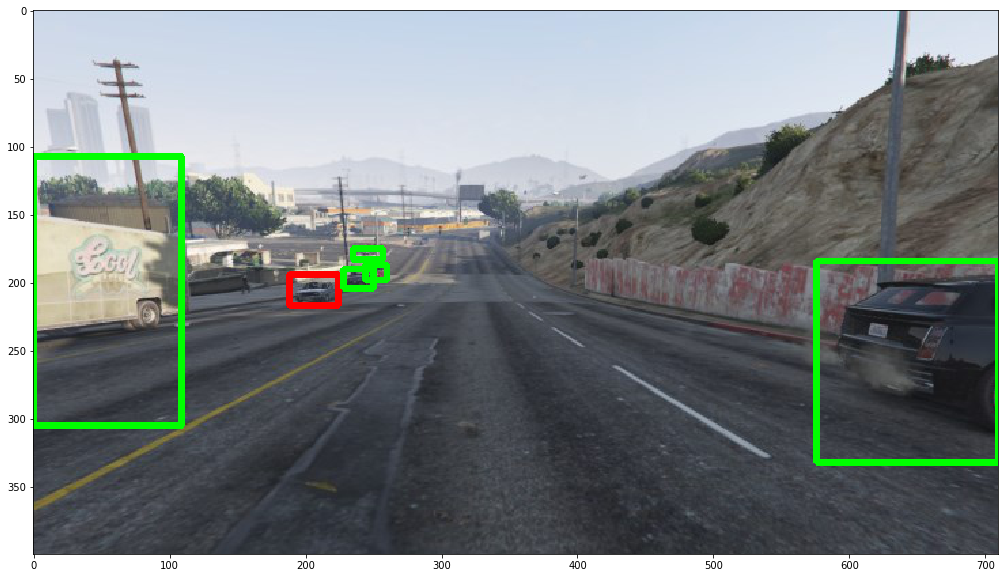

In [5]:
for vehicle_dict in sample_accident_label['vehicleInfo']:
    x,y,width,height = vehicle_dict['x'], vehicle_dict['y'], vehicle_dict['width'], vehicle_dict['height']

    label = vehicle_dict['syntheticLabel']
    if label == "true":
        draw_bounding_box(sample_accident_img,x,y,width,height,"red")
        
    elif label == "false":
        draw_bounding_box(sample_accident_img,x,y,width,height,"green")
plt.figure(figsize=(20,10))
plt.imshow(sample_accident_img)
plt.show()

### Visualization of a sample accident scene with bounding boxes (After label adaptation)
- Green bounding boxes: Safe vehicles
- Red bounding boxes: Dangerous vehicles

After applying the label adaptation, we can see that the physics model considers the car as safe until it really shows physically dangerous motion.

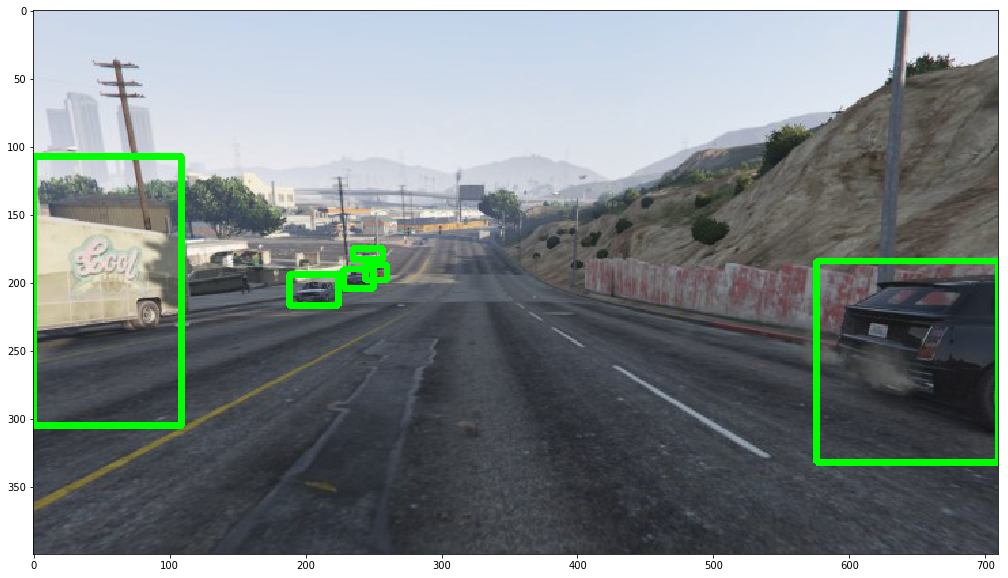

In [6]:
for vehicle_dict in sample_accident_label['vehicleInfo']:
    x,y,width,height = vehicle_dict['x'], vehicle_dict['y'], vehicle_dict['width'], vehicle_dict['height']

    label = vehicle_dict['adaptedLabel']
    if label > 0:
        draw_bounding_box(sample_accident_img,x,y,width,height,"red")
        
    else:
        draw_bounding_box(sample_accident_img,x,y,width,height,"green")
plt.figure(figsize=(20,10))
plt.imshow(sample_accident_img)
plt.show()

## 2. YouTubeCrash

### Sample accident scene image
001275.jpg is a sample accident scene image in our YouTubeCrash dataset. There are total 2 cars on this image, a blue SUV on the left which actually collides with the ego-vehicle and a blue light truck on the front heading left.

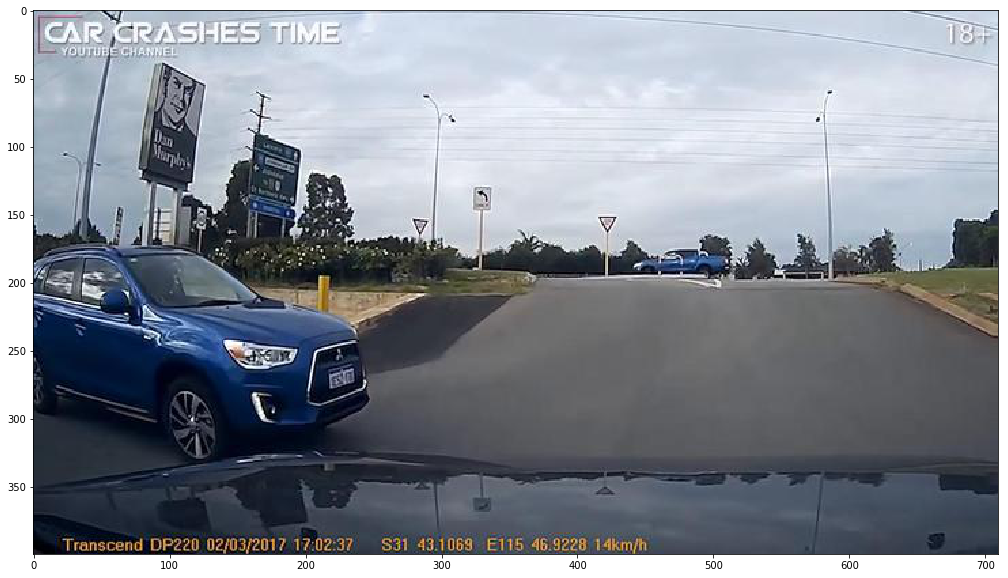

In [10]:
sample_accident_img = imread("./YoutubeCrash_accident_train/001275.jpg")
plt.figure(figsize=(20,10))
plt.imshow(sample_accident_img)
plt.show()

### Sample accident scene label
The "label" attribute of the blue SUV is True, while the one of light truck is False.

In [11]:
with open('./YoutubeCrash_accident_train/001275.json') as data_file:
    sample_accident_label = json.load(data_file)
pprint.pprint(sample_accident_label)

{'acceleration': 'NA',
 'angularVelocity': 'NA',
 'forwardV': 'NA',
 'objectSize': 'NA',
 'position': 'NA',
 'speed': 'NA',
 'vehicleCount': 2,
 'vehicleInfo': [{'acceleration': 'NA',
                  'adaptedLabel': 'NA',
                  'angularVelocity': 'NA',
                  'driverAlive': 'true',
                  'driverExist': 'true',
                  'forwardV': 'NA',
                  'hashcode': 0,
                  'height': 165,
                  'objectSize': 'NA',
                  'position': 'NA',
                  'speed': 'NA',
                  'syntheticLabel': 'true',
                  'width': 247,
                  'x': 1,
                  'y': 167},
                 {'acceleration': 'NA',
                  'adaptedLabel': 'NA',
                  'angularVelocity': 'NA',
                  'driverAlive': 'true',
                  'driverExist': 'true',
                  'forwardV': 'NA',
                  'hashcode': 1,
                  'height': 23,
     

### Visualization of a sample accident scene with bounding boxes
- Green bounding boxes: Safe vehicles
- Red bounding boxes: Dangerous vehicles

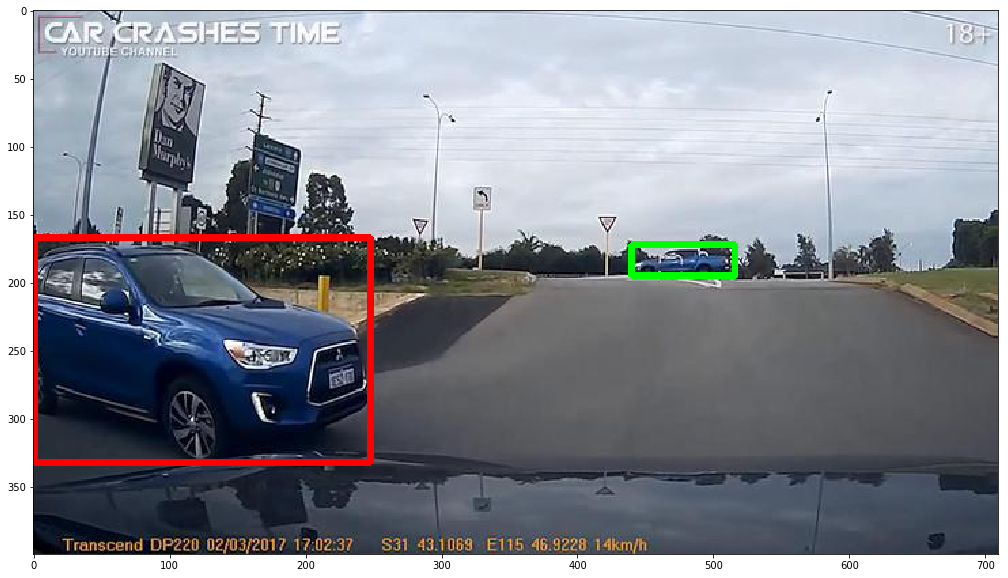

In [12]:
for vehicle_dict in sample_accident_label['vehicleInfo']:
    x,y,width,height = vehicle_dict['x'], vehicle_dict['y'], vehicle_dict['width'], vehicle_dict['height']

    label = vehicle_dict['syntheticLabel']
    if label == "true":
        draw_bounding_box(sample_accident_img,x,y,width,height,"red")
        
    elif label == "false":
        draw_bounding_box(sample_accident_img,x,y,width,height,"green")
plt.figure(figsize=(20,10))
plt.imshow(sample_accident_img)
plt.show()